In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Data Summarization

In [67]:
training_df= pd.read_excel('Restaurant_Data_Train.xlsx')
testing_df= pd.read_excel('Restaurant_Data_Test.xlsx')

In [3]:
training_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


    1.Title of the restaurant is in upper case. We can convert it to lower case.
    2.We can drop Restaurant ID and Time column.
    3.Should encode all catergorical variables.
    4.From Votes column, 'votes' keyword should be removed.

In [68]:
training_df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


    1. Outliers may be present as there is wide gap between 75% and max values.
    2. Mean > Median slightlu, which implies slight right skewness may be seen.

# Data Visualization and Manipulation

In [4]:
#split the title columns into two columns
training_df_title = training_df['TITLE'].apply(lambda x: pd.Series(x.split(',')))
print("Missing values in each columns :")
print(training_df_title.isnull().sum())

Missing values in each columns :
0        0
1    11208
dtype: int64


In [5]:
#Replace all NaNs with variable None for training data
training_df_title[1].replace(np.NaN,'None',inplace=True)

In [6]:
testing_df_title = testing_df['TITLE'].apply(lambda x: pd.Series(x.split(',')))
print("Missing values in each columns :")
print(testing_df_title.isnull().sum())

Missing values in each columns :
0       0
1    3769
dtype: int64


In [7]:
#Replace all NaNs with variable None for testing data
testing_df_title[1].replace(np.NaN,'None',inplace=True)

In [8]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


    We have object data types which needs to be converted to float or int.

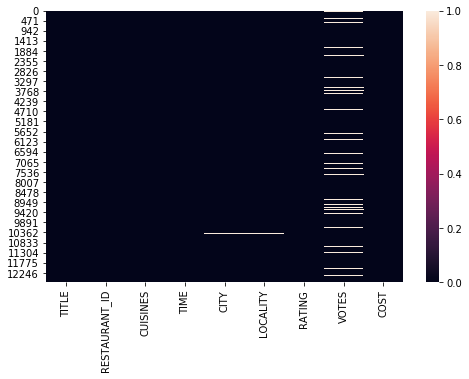

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(training_df.isnull())

    Votes column has maximum number of null values.

In [ ]:
training_df.isnull().sum()

In [10]:
training_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


Text(0.5, 1.0, 'Types of Restaurants')

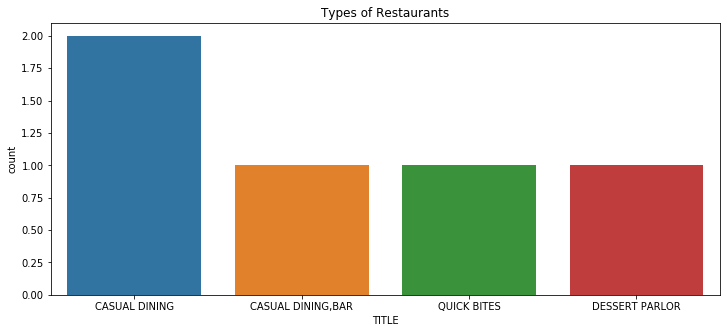

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(training_df['TITLE'][0:5])
plt.title("Types of Restaurants")

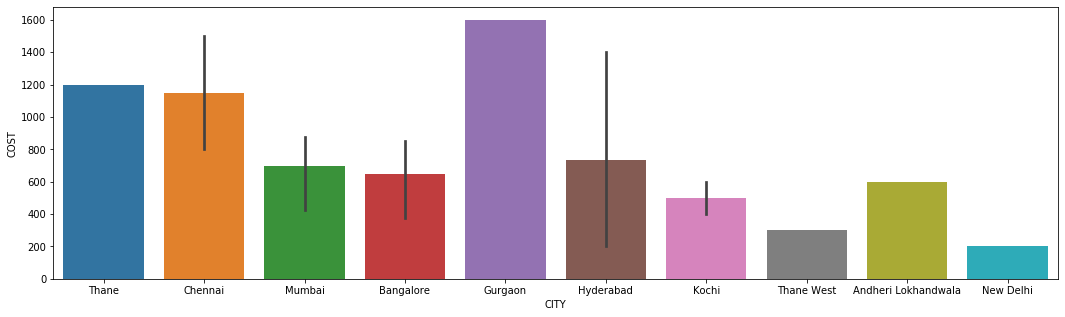

In [12]:
costly_city = pd.DataFrame(training_df.groupby('CITY',as_index=False)['COST'].sum()).sort_values(by='COST',ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(x='CITY',y='COST',data=training_df[:20])

     We can observe that food restaurants are costliest in Gurgaon, followed by Chennai and Thane.

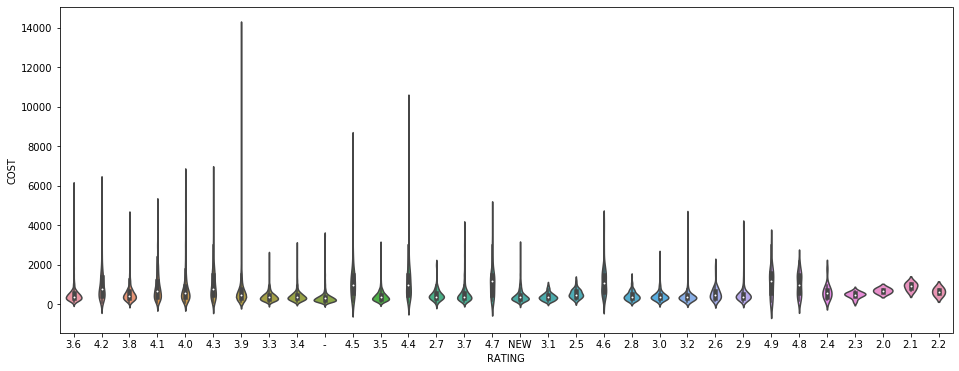

In [13]:
#plt.figure(figsize=(30,20))
plt.rcParams["figure.figsize"] = [16,6]

sns.violinplot(x='RATING',y='COST',data=training_df)

    We can observe that Restaurants rated between 3.6 and 4.7 has high cost and restauramts with lower ratings have lower
    cost.

In [14]:
#Split cuisine columns into multiple columns
training_df_cuisine = training_df['CUISINES'].apply(lambda x: pd.Series(x.split(',')))
print("Missing values in each columns :")
print(training_df_cuisine.isnull().sum())

Missing values in each columns :
0        0
1     3062
2     6999
3     9995
4    11675
5    12276
6    12514
7    12613
dtype: int64


In [15]:
#Replace all NaNs with variable None in training data
training_df_cuisine.replace(np.NaN,'None',inplace=True)

In [16]:
testing_df_cuisine = testing_df['CUISINES'].apply(lambda x: pd.Series(x.split(',')))
print("Missing values in each columns :")
print(testing_df_cuisine.isnull().sum())

Missing values in each columns :
0       0
1     985
2    2331
3    3314
4    3875
5    4094
6    4157
7    4200
dtype: int64


In [17]:
#Replace all NaNs with variable None for testing data
testing_df_cuisine.replace(np.NaN,'None',inplace=True)

In [18]:
training_df[['TITLE1','TITLE2']] = training_df_title[[0,1]]
training_df[['C1','C2','C3','C4','C5','C6','C7','C8']] = training_df_cuisine[[0,1,2,3,4,5,6,7]]

In [19]:
testing_df[['TITLE1','TITLE2']] = testing_df_title[[0,1]]
testing_df[['C1','C2','C3','C4','C5','C6','C7','C8']] = testing_df_cuisine[[0,1,2,3,4,5,6,7]]

In [20]:
#drop TITLE,CUISINES,RESTAURANT_ID,TIME
cols = ['TITLE','CUISINES','RESTAURANT_ID','TIME']
for i in range(len(cols)):
    training_df.drop(cols[i],axis=1,inplace=True)
    testing_df.drop(cols[i],axis=1,inplace=True)

In [21]:
#Votes column has keyword votes, to remove them we use regular expression.
training_df['VOTES'].replace(r"[^0-9]","",regex=True,inplace=True)
testing_df['VOTES'].replace(r"[^0-9]","",regex=True,inplace=True)

In [22]:
#Arrange the columns as desired :
training_df = training_df[[c for c in training_df if c not in ['TITLE1','TITLE2','C1','C2','C3','C4','C5','C6','C7','C8','LOCALITY','CITY',
                                                               'RATING','VOTES','COST']] + ['TITLE1','TITLE2','C1','C2','C3','C4','C5',
                                                                                            'C6','C7','C8','LOCALITY','CITY','RATING',
                                                                                            'VOTES','COST']]


testing_df = testing_df[[c for c in testing_df if c not in ['TITLE1','TITLE2','C1','C2','C3','C4','C5','C6','C7','C8','LOCALITY','CITY',
                                                               'RATING','VOTES']] + ['TITLE1','TITLE2','C1','C2','C3','C4','C5',
                                                                                            'C6','C7','C8','LOCALITY','CITY','RATING',
                                                                                            'VOTES']]

In [23]:
#convert df to lower case
training_df = training_df.apply(lambda x: x.astype(str).str.lower())
testing_df = testing_df.apply(lambda x: x.astype(str).str.lower())

In [24]:
testing_df[testing_df['VOTES'] == 'nan']

,TITLE1,TITLE2,C1,C2,C3,C4,C5,C6,C7,C8,LOCALITY,CITY,RATING,VOTES
6,casual dining,none,north indian,street food,fast food,none,none,none,none,none,kharghar,navi mumbai,new,nan
21,casual dining,none,north indian,south indian,none,none,none,none,none,none,anna salai,chennai,new,nan
24,quick bites,none,biryani,andhra,north indian,none,none,none,none,none,banaswadi,bangalore,new,nan
27,casual dining,none,continental,italian,none,none,none,none,none,none,btm,bangalore,new,nan
29,quick bites,none,north indian,chinese,none,none,none,none,none,none,bandra west,mumbai,new,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,café,none,cafe,north indian,none,none,none,none,none,none,sector 63,noida,new,nan
4185,quick bites,none,fast food,none,none,none,none,none,none,none,shalimar bagh,new delhi,new,nan
4198,quick bites,none,continental,none,none,none,none,none,none,none,indiranagar,bangalore,new,nan
4223,casual dining,none,sindhi,street food,none,none,none,none,none,none,lower parel,mumbai,new,nan


In [25]:
training_df[training_df['VOTES'] == 'nan']

,TITLE1,TITLE2,C1,C2,C3,C4,C5,C6,C7,C8,LOCALITY,CITY,RATING,VOTES,COST
13,casual dining,none,south indian,none,none,none,none,none,none,none,edappally,kochi,-,nan,400
62,quick bites,none,north indian,beverages,none,none,none,none,none,none,kalamassery,kochi,new,nan,200
69,none,none,pizza,fast food,none,none,none,none,none,none,kalkaji,new delhi,new,nan,200
85,quick bites,none,north indian,south indian,none,none,none,none,none,none,vijay nagar,bangalore,-,nan,300
111,casual dining,none,gujarati,rajasthani,north indian,none,none,none,none,none,borivali west,mumbai,new,nan,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12630,casual dining,none,tex-mex,italian,coffee,none,none,none,none,none,golf course road,gurgaon,new,nan,1200
12641,casual dining,none,kerala,none,none,none,none,none,none,none,pallimukku,kochi,-,nan,300
12646,quick bites,none,kerala,chinese,none,none,none,none,none,none,market road,ernakulam,-,nan,300
12658,none,none,kerala,south indian,none,none,none,none,none,none,chittoor road,kochi,new,nan,400


In [26]:
training_df['VOTES'].replace('nan',0,inplace=True)
testing_df['VOTES'].replace('nan',0,inplace=True)

In [27]:
training_df['RATING'].replace('nan',0,inplace=True)
testing_df['RATING'].replace('nan',0,inplace=True)

In [28]:
training_df[training_df['RATING'] == 'new']

,TITLE1,TITLE2,C1,C2,C3,C4,C5,C6,C7,C8,LOCALITY,CITY,RATING,VOTES,COST
62,quick bites,none,north indian,beverages,none,none,none,none,none,none,kalamassery,kochi,new,0,200
69,none,none,pizza,fast food,none,none,none,none,none,none,kalkaji,new delhi,new,0,200
111,casual dining,none,gujarati,rajasthani,north indian,none,none,none,none,none,borivali west,mumbai,new,0,800
117,quick bites,none,north indian,chinese,none,none,none,none,none,none,dwarka,new delhi,new,0,500
120,quick bites,none,north indian,south indian,none,none,none,none,none,none,whitefield,bangalore-560066,new,0,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12602,quick bites,none,rolls,north indian,biryani,none,none,none,none,none,mahakali,mumbai,new,0,200
12613,casual dining,none,asian,thai,sushi,healthy food,none,none,none,none,dlf phase 4,gurgaon,new,0,950
12630,casual dining,none,tex-mex,italian,coffee,none,none,none,none,none,golf course road,gurgaon,new,0,1200
12658,none,none,kerala,south indian,none,none,none,none,none,none,chittoor road,kochi,new,0,400


In [29]:
testing_df[testing_df['RATING'] == 'new']

,TITLE1,TITLE2,C1,C2,C3,C4,C5,C6,C7,C8,LOCALITY,CITY,RATING,VOTES
6,casual dining,none,north indian,street food,fast food,none,none,none,none,none,kharghar,navi mumbai,new,0
21,casual dining,none,north indian,south indian,none,none,none,none,none,none,anna salai,chennai,new,0
24,quick bites,none,biryani,andhra,north indian,none,none,none,none,none,banaswadi,bangalore,new,0
27,casual dining,none,continental,italian,none,none,none,none,none,none,btm,bangalore,new,0
29,quick bites,none,north indian,chinese,none,none,none,none,none,none,bandra west,mumbai,new,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,casual dining,none,american,italian,none,none,none,none,none,none,fort,mumbai,new,0
4183,café,none,cafe,north indian,none,none,none,none,none,none,sector 63,noida,new,0
4185,quick bites,none,fast food,none,none,none,none,none,none,none,shalimar bagh,new delhi,new,0
4198,quick bites,none,continental,none,none,none,none,none,none,none,indiranagar,bangalore,new,0


In [30]:
training_df['RATING'].replace('new',0,inplace=True)
testing_df['RATING'].replace('new',0,inplace=True)

In [31]:
training_df[training_df['RATING'] == '-']

,TITLE1,TITLE2,C1,C2,C3,C4,C5,C6,C7,C8,LOCALITY,CITY,RATING,VOTES,COST
13,casual dining,none,south indian,none,none,none,none,none,none,none,edappally,kochi,-,0,400
85,quick bites,none,north indian,south indian,none,none,none,none,none,none,vijay nagar,bangalore,-,0,300
156,quick bites,none,south indian,none,none,none,none,none,none,none,vyttila,kochi,-,0,400
178,casual dining,none,indian,chinese,none,none,none,none,none,none,vennala,kochi,-,0,400
235,quick bites,none,kerala,none,none,none,none,none,none,none,near marine drive,kochi,-,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,quick bites,none,kerala,biryani,none,none,none,none,none,none,panampilly nagar,kochi,-,0,300
12585,casual dining,none,kerala,none,none,none,none,none,none,none,elamkulam,kochi,-,0,400
12591,beverage shop,none,beverages,juices,desserts,none,none,none,none,none,edappally,kochi,-,0,150
12641,casual dining,none,kerala,none,none,none,none,none,none,none,pallimukku,kochi,-,0,300


In [32]:
testing_df[testing_df['RATING'] == '-']

,TITLE1,TITLE2,C1,C2,C3,C4,C5,C6,C7,C8,LOCALITY,CITY,RATING,VOTES
37,quick bites,none,kerala,fast food,none,none,none,none,none,none,edappally,kochi,-,0
66,quick bites,none,south indian,none,none,none,none,none,none,none,pallimukku,kochi,-,0
73,quick bites,none,kerala,south indian,none,none,none,none,none,none,thevera,kochi,-,0
108,bakery,none,bakery,none,none,none,none,none,none,none,thopumpady,kochi,-,0
130,beverage shop,none,beverages,none,none,none,none,none,none,none,marine drive,kochi,-,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,quick bites,none,chinese,south indian,none,none,none,none,none,none,kaloor,kochi,-,0
4030,casual dining,none,kerala,biryani,none,none,none,none,none,none,kacheripady,kochi,-,0
4109,casual dining,none,italian,desserts,continental,none,none,none,none,none,near express garden,kk road,-,0
4172,quick bites,none,north indian,chinese,kerala,none,none,none,none,none,palarivattom,kochi,-,0


In [33]:
training_df['RATING'].replace('-',0,inplace=True)
testing_df['RATING'].replace('-',0,inplace=True)

In [34]:
training_df.head()

,TITLE1,TITLE2,C1,C2,C3,C4,C5,C6,C7,C8,LOCALITY,CITY,RATING,VOTES,COST
0,casual dining,none,malwani,goan,north indian,none,none,none,none,none,dombivali east,thane,3.6,49,1200
1,casual dining,bar,asian,modern indian,japanese,none,none,none,none,none,ramapuram,chennai,4.2,30,1500
2,casual dining,none,north indian,chinese,biryani,hyderabadi,none,none,none,none,saligramam,chennai,3.8,221,800
3,quick bites,none,tibetan,chinese,none,none,none,none,none,none,bandra west,mumbai,4.1,24,800
4,dessert parlor,none,desserts,none,none,none,none,none,none,none,lower parel,mumbai,3.8,165,300


In [35]:
#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['TITLE1','TITLE2','C1','C2','C3','C4','C5','C6','C7','C8','LOCALITY','CITY']

for each in range(len(cols)):
    training_df[cols[each]] = le.fit_transform(training_df[cols[each]])
    testing_df[cols[each]] = le.fit_transform(testing_df[cols[each]])

In [36]:
cols = testing_df.columns
for i in range(len(cols)):
    testing_df[cols[i]] = testing_df[cols[i]].astype(str).astype(float)
    training_df[cols[i]] = training_df[cols[i]].astype(str).astype(float)



In [37]:
training_df['COST'] = training_df['COST'].astype(str).astype(float)

In [38]:
training_df[training_df['RATING'] == 0]

,TITLE1,TITLE2,C1,C2,C3,C4,C5,C6,C7,C8,LOCALITY,CITY,RATING,VOTES,COST
13,4.0,15.0,90.0,98.0,93.0,85.0,78.0,69.0,47.0,19.0,302.0,176.0,0.0,0.0,400.0
62,21.0,15.0,72.0,12.0,93.0,85.0,78.0,69.0,47.0,19.0,476.0,176.0,0.0,0.0,200.0
69,18.0,15.0,77.0,28.0,93.0,85.0,78.0,69.0,47.0,19.0,480.0,256.0,0.0,0.0,200.0
85,21.0,15.0,72.0,84.0,93.0,85.0,78.0,69.0,47.0,19.0,1352.0,33.0,0.0,0.0,300.0
111,4.0,15.0,38.0,75.0,66.0,85.0,78.0,69.0,47.0,19.0,178.0,225.0,0.0,0.0,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12630,4.0,15.0,98.0,42.0,22.0,85.0,78.0,69.0,47.0,19.0,354.0,121.0,0.0,0.0,1200.0
12641,4.0,15.0,52.0,98.0,93.0,85.0,78.0,69.0,47.0,19.0,965.0,176.0,0.0,0.0,300.0
12646,21.0,15.0,52.0,23.0,93.0,85.0,78.0,69.0,47.0,19.0,665.0,105.0,0.0,0.0,300.0
12658,18.0,15.0,52.0,84.0,93.0,85.0,78.0,69.0,47.0,19.0,227.0,176.0,0.0,0.0,400.0


In [39]:
mean = training_df['RATING'].mean()
training_df['RATING'].replace(0,mean,inplace=True)

mean = training_df['VOTES'].mean()
training_df['VOTES'].replace(0,mean,inplace=True)

In [40]:
mean = testing_df['RATING'].mean()
testing_df['RATING'].replace(0,mean,inplace=True)

mean = testing_df['VOTES'].mean()
testing_df['VOTES'].replace(0,mean,inplace=True)

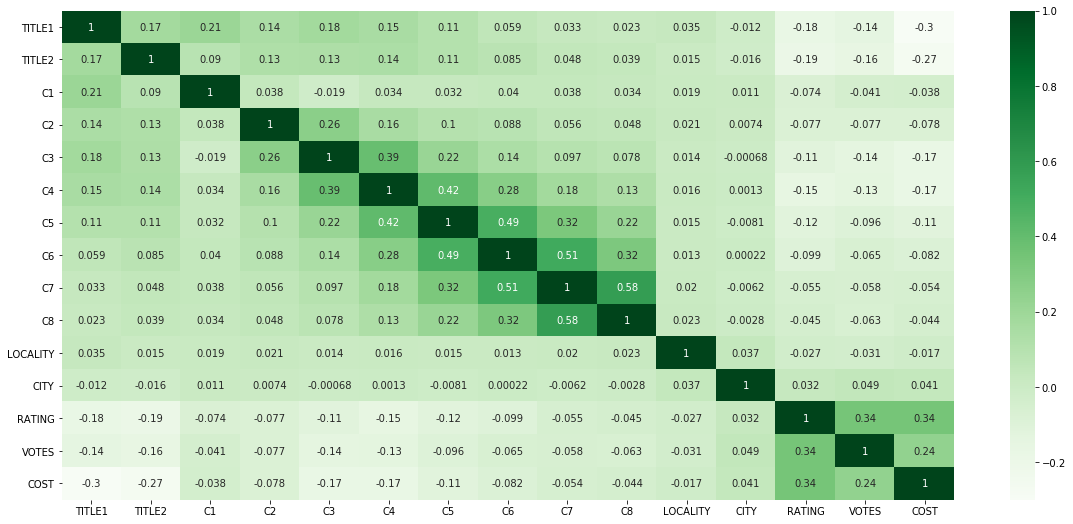

In [41]:
#Find correlation between variables :
corr = training_df.corr()
plt.figure(figsize=(20,9))
sns.heatmap(corr,annot=True,cmap='Greens')

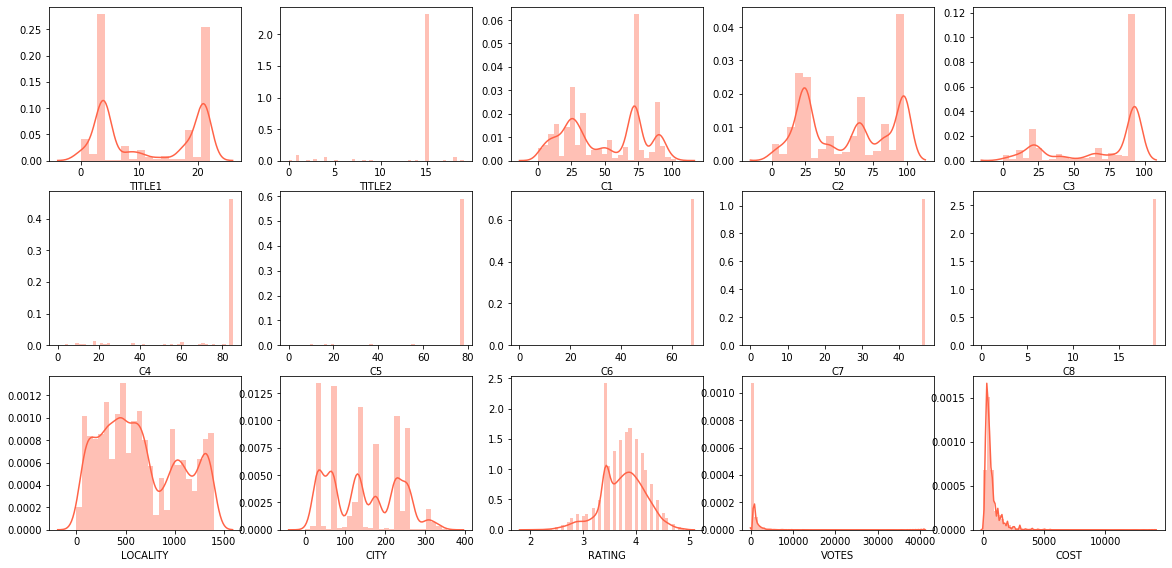

In [42]:
#Check for skewness
col = training_df.columns.values
plt.figure(figsize=(20,30))
for i in range(0,len(col)):
    plt.subplot(9,5,i+1)
    sns.distplot(training_df[col[i]],color='tomato')
plt.show()

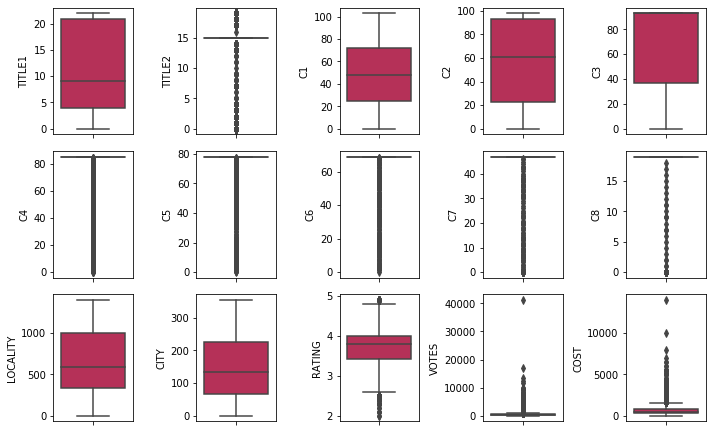

In [43]:
#Check for outliers :
plt.figure(figsize=(10,20))
for i in range(0,len(col)):
    plt.subplot(10,5,i+1)
    sns.boxplot(training_df[col[i]],palette='rocket',orient='v')
    plt.tight_layout()

In [44]:
col = ['TITLE2','C4','C5','C6','C7','C8']

for i in range(len(col)):
    training_df.drop(col[i],axis=1,inplace=True)
    testing_df.drop(col[i],axis=1,inplace=True)

In [45]:
#Use z-score to remove outliers :
from scipy.stats import zscore
#data.info()
z=np.abs(zscore(training_df))
print(np.where(z>3))

(array([   84,   159,   186,   196,   208,   293,   303,   304,   308,
         337,   344,   354,   379,   422,   431,   469,   502,   510,
         563,   599,   672,   731,   775,   796,   839,   852,   855,
         872,   913,   966,   967,   973,  1008,  1020,  1034,  1038,
        1132,  1133,  1147,  1151,  1193,  1244,  1288,  1345,  1346,
        1395,  1467,  1470,  1475,  1476,  1522,  1540,  1594,  1617,
        1632,  1657,  1681,  1685,  1759,  1773,  1778,  1816,  1828,
        1850,  1878,  1884,  1916,  1930,  1931,  1973,  2068,  2090,
        2100,  2111,  2188,  2204,  2205,  2207,  2268,  2302,  2305,
        2333,  2339,  2349,  2369,  2459,  2488,  2531,  2604,  2610,
        2622,  2683,  2686,  2689,  2695,  2740,  2778,  2886,  2905,
        2921,  2940,  2969,  2973,  2977,  3002,  3028,  3033,  3036,
        3049,  3170,  3197,  3206,  3211,  3289,  3309,  3333,  3338,
        3396,  3397,  3398,  3408,  3483,  3491,  3492,  3507,  3526,
        3528,  3532

In [46]:
#new df with no outliers.
training_df_new = training_df[(z<3).all(axis=1)]

In [47]:
print(training_df.shape,"\t",training_df_new.shape)

(12690, 9) 	 (12202, 9)


In [48]:
from sklearn.model_selection import train_test_split

X = training_df_new.drop('COST',axis=1)
y = training_df_new.iloc[:,-1:]

In [49]:
X.skew()

TITLE1      0.062405
C1          0.023474
C2          0.053086
C3         -0.844429
LOCALITY    0.345809
CITY        0.215600
RATING     -0.188218
VOTES       2.557942
dtype: float64

In [50]:
#To remove skewness :
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('yeo-johnson')
X = pd.DataFrame(pt.fit_transform(X))

In [51]:
#Scaling of Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

# Data Modelling and Evaluation

In [52]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [53]:
# algorithm to calculate the random state where models give better score :
def calBestRandomStateOf(model):
    max_score=0
    for i in range(40,200):
        x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = r2_score(y_test,pred)
        if score>max_score:
            max_score = score
            final_state = i

    return final_state


In [54]:
model = [LR(),DTR(),KNR(),SVR(),Lasso(),Ridge(),ElasticNet()]

for i in range(len(model)):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=107)
    model[i].fit(x_train,y_train)
    y_pred = model[i].predict(x_test)
    r2Score = r2_score(y_test,y_pred)
    
    print("*************************************************************************************")
    print(model[i])
    print("R2 Score : ",r2Score)
    print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))
    print("")
    print("*************************************************************************************")



*************************************************************************************
LinearRegression()
R2 Score :  0.2909474744778794
Mean Absolute Error :  264.0411384307217
Mean Squared Error :  147031.33862633115
Root Mean Squared Error :  383.44665681986476

*************************************************************************************
*************************************************************************************
DecisionTreeRegressor()
R2 Score :  0.45747835824433325
Mean Absolute Error :  223.141198962174
Mean Squared Error :  112498.97623924621
Root Mean Squared Error :  335.408670489071

*************************************************************************************
*************************************************************************************
KNeighborsRegressor()
R2 Score :  0.3707122131340076
Mean Absolute Error :  234.35968865219172
Mean Squared Error :  130491.07414993855
Root Mean Squared Error :  361.2354829608223

***************************

In [55]:
from sklearn.model_selection import cross_val_score
for i in range(len(model)):
    cv_score = cross_val_score(model[i],X,y,cv=5,scoring='r2')
    print("*************************************************************************************")
    print("Score for ",model[i]," : ")
    print("Score : ", cv_score)
    print("Mean : ", cv_score.mean())
    print("Standard Deviation : ", cv_score.std())
    print("*************************************************************************************")
    print("")

*************************************************************************************
Score for  LinearRegression()  : 
Score :  [0.26673488 0.28162482 0.27655272 0.26204322 0.27758435]
Mean :  0.2729079966091798
Standard Deviation :  0.007311444404065266
*************************************************************************************

*************************************************************************************
Score for  DecisionTreeRegressor()  : 
Score :  [0.34306234 0.33874284 0.31000161 0.38798846 0.40796141]
Mean :  0.35755133087070534
Standard Deviation :  0.03547467137330244
*************************************************************************************

*************************************************************************************
Score for  KNeighborsRegressor()  : 
Score :  [0.34863275 0.34975049 0.34836994 0.31330317 0.36499488]
Mean :  0.34501024505174993
Standard Deviation :  0.017038806166025575
*************************************************

In [56]:
DTR().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [3, None],
              "splitter": ['best','random'],
              "max_features": ['auto','sqrt','log2'],
              "min_samples_leaf": range(1, 9),
              "criterion": ["mse", "friedman_mse", "mae"]}

gridsearch = GridSearchCV(DTR(),parameters,n_jobs=-1,pre_dispatch=2)
gridsearch.fit(X,y)
gridsearch.best_params_

{'criterion': 'friedman_mse',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'splitter': 'best'}

In [58]:
dtr = DTR(criterion='friedman_mse',max_depth=None,max_features='auto',min_samples_leaf=8,splitter='best')
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state = 72)
dtr.fit(x_train,y_train)
score = dtr.score(x_train,y_train)
print("Score for Decision Tree regression : ",score)
y_pred = dtr.predict(x_test)
r2Score = r2_score(y_test,y_pred)
print("R2 Score for Decision Tree Regression : ",r2Score)
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))


Score for Decision Tree regression :  0.7741393816292145
R2 Score for Decision Tree Regression :  0.5352112334946941
Mean Squared Error :  82782.15435999639
Mean Absolute Error :  192.34084184177928
Root Mean Squared Error :  287.718880784693


In [59]:
#Adaboost Regressor and RandomforestRegressor
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR


In [60]:
ada = ABR(n_estimators=20)
gradient = GBR(n_estimators=20)
rfr = RFR(n_estimators=20)

state1 = calBestRandomStateOf(ada)
state2 = calBestRandomStateOf(gradient)
state3 = calBestRandomStateOf(rfr)

ada = ABR(n_estimators=20,random_state=state1)
gradient = GBR(n_estimators=20,random_state=state2)
rfr = RFR(n_estimators=20,random_state=state3)

boosting_model = [ada,gradient,rfr]

for i in range(len(boosting_model)):
    boost = boosting_model[i]
    boost.fit(x_train,y_train)
    pred = boost.predict(x_test)
    r2Score = r2_score(y_test,pred)
    print("-----------------------------------------------------------")
    print(boost)
    print("-----------------------------------------------------------")
    print("R2 Score : ", r2Score)
    print("\n")

-----------------------------------------------------------
AdaBoostRegressor(n_estimators=20, random_state=54)
-----------------------------------------------------------
R2 Score :  0.17967651623760195


-----------------------------------------------------------
GradientBoostingRegressor(n_estimators=20, random_state=127)
-----------------------------------------------------------
R2 Score :  0.43513987284363975


-----------------------------------------------------------
RandomForestRegressor(n_estimators=20, random_state=155)
-----------------------------------------------------------
R2 Score :  0.6408642879734037




    Random Forest Regression performs the best amongst all the regression models and hence will be our final model

In [61]:
rfr.fit(x_train,y_train)
y_pred= rfr.predict(x_test)
r2score = r2_score(y_test,y_pred)
print("R2 Score for Gradient Boost Regressor : ",r2score)
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score for Gradient Boost Regressor :  0.6408642879734037
Mean Absolute Error :  172.88302039237107
Mean Squared Error :  63964.600893239345
Root Mean Squared Error :  252.91223950856815


In [63]:
import joblib

joblib.dump(rfr,'RandamForestModel.obj')

rfr_from_joblib = joblib.load('RandamForestModel.obj')

finalOutput = rfr_from_joblib.predict(testing_df)

In [65]:
#save final output to a csv file :
pd.DataFrame(finalOutput).to_csv("Restaurant_Cost_Output.csv")